In [1]:
from collections import Counter
from Bio import SeqIO
import matplotlib.pyplot as plt
import random
import pandas as pd

In [2]:
used_classes = {
    'Actinopteri_186623',
    'Aves_8782',
    'Mammalia_40674',
    'Lepidosauria_8504',
    'Amphibia_8292',
    'Chondrichthyes_7777',
}

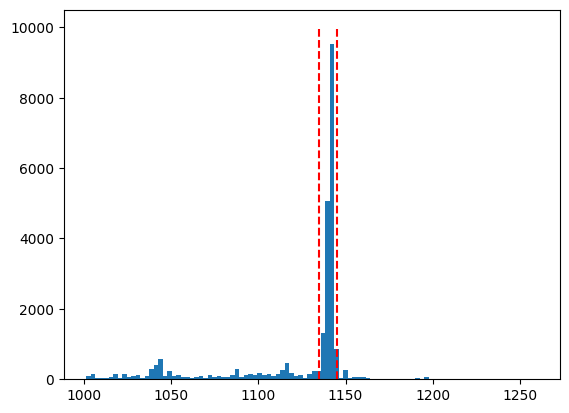

In [3]:
cytb_longest = SeqIO.parse('./vert_data/MIDORI2_LONGEST_NUC_GB264_Cytb_BLAST.fasta', 'fasta')
human_size = 1140
shift = 5
sizes = []
classes = []
verts = []
for rec in cytb_longest:
    if 'Chordata_7711' in rec.name:
        classes.append(rec.name.split(';')[3])
        sizes.append(len(rec))
        if human_size-shift < len(rec) < human_size+shift and rec.name.split(';')[3] in used_classes:
            verts.append(rec)
plt.hist([x for x in sizes if x > 1000], bins=100)
plt.vlines([human_size-shift, human_size+shift], 0, 10000, 'r', '--')
random.shuffle(verts)

In [4]:
Counter(classes)

Counter({'Actinopteri_186623': 13355,
         'Aves_8782': 7282,
         'Mammalia_40674': 5199,
         'Lepidosauria_8504': 4615,
         'Amphibia_8292': 3265,
         'Chondrichthyes_7777': 407,
         'class_Testudines_8459': 355,
         'Ascidiacea_7713': 52,
         'Hyperoartia_117569': 45,
         'class_Crocodylia_1294634': 27,
         'Cladistia_1338366': 12,
         'Leptocardii_2682552': 8,
         'Thaliacea_30304': 7,
         'Myxini_117565': 6,
         'class_Ceratodontiformes_2823314': 4,
         'class_Coelacanthiformes_7894': 2})

In [5]:
len(sizes), len(verts)

(34641, 16078)

[SeqRecord(seq=Seq('ATTGTTATGTTTCGTAAAAATGAACTTGTTAGTCTTTTTTTAAGATCATTTAGT...GAT'), id='OUTGRP|HG931923.1.7035.8148###root_1;Eukaryota_2759;Chordata_7711;Ascidiacea_7713;Stolidobranchia_7720;Styelidae_7721;Botryllus_30300;Botryllus_schlosseri_30301', name='HG931923.1.7035.8148###root_1;Eukaryota_2759;Chordata_7711;Ascidiacea_7713;Stolidobranchia_7720;Styelidae_7721;Botryllus_30300;Botryllus_schlosseri_30301', description='HG931923.1.7035.8148###root_1;Eukaryota_2759;Chordata_7711;Ascidiacea_7713;Stolidobranchia_7720;Styelidae_7721;Botryllus_30300;Botryllus_schlosseri_30301', dbxrefs=[])]

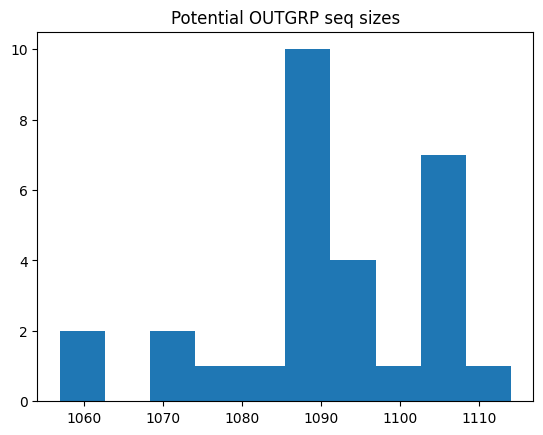

In [21]:
# derive outgrp
cytb_longest = SeqIO.parse('./vert_data/MIDORI2_LONGEST_NUC_GB264_Cytb_BLAST.fasta', 'fasta')
human_size = 1140
shift = 30
outgrp = []
sizes = []
for rec in cytb_longest:
    if 'Ascidiacea_7713' in rec.name and len(rec) > 1000:
        sizes.append(len(rec))
        if human_size-shift < len(rec) < human_size+shift and rec.name.split(';')[3]:
            outgrp.append(rec)
            break
plt.hist(sizes)
plt.title('Potential OUTGRP seq sizes')
outgrp[0].id = 'OUTGRP|' + outgrp[0].id
outgrp

In [ ]:
SeqIO.write(outgrp + verts[:5000], 'vert_data/chordates5k.fa', 'fasta-2line')

2001

In [8]:
Counter(outgrp[0].seq)

Counter({'T': 517, 'A': 279, 'G': 176, 'C': 142})

## taxa distribution approach

In [7]:
taxa = pd.DataFrame([x.name.split(';') for x in verts]).iloc[:, 3:]
taxa

,3,4,5,6,7
0,Actinopteri_186623,Beloniformes_76071,Exocoetidae_76072,Cheilopogon_293908,Cheilopogon_exsiliens_938381
1,Mammalia_40674,Chiroptera_9397,Phyllostomidae_9415,Artibeus_9416,Artibeus_inopinatus_51013
2,Mammalia_40674,Rodentia_9989,Muridae_10066,Mus_10088,Mus_haussa_273922
3,Actinopteri_186623,Perciformes_8111,Percidae_8165,Etheostoma_54318,Etheostoma_pseudovulatum_91963
4,Aves_8782,Passeriformes_9126,Fringillidae_9133,Carpodacus_30426,Carpodacus_thura_64796
...,...,...,...,...,...
16073,Actinopteri_186623,Cypriniformes_7952,Leuciscidae_2743726,Telestes_103461,Telestes_dabar_1483148
16074,Actinopteri_186623,Cypriniformes_7952,Xenocyprididae_2743745,Plagiognathops_927612,Plagiognathops_microlepis_70548
16075,Lepidosauria_8504,Squamata_8509,Agamidae_81953,Phrynocephalus_52205,Phrynocephalus_axillaris_103693
16076,Actinopteri_186623,Chaetodontiformes_1545895,Leiognathidae_30846,Photopectoralis_334404,Photopectoralis_bindus_274455


### prepare one species from genus

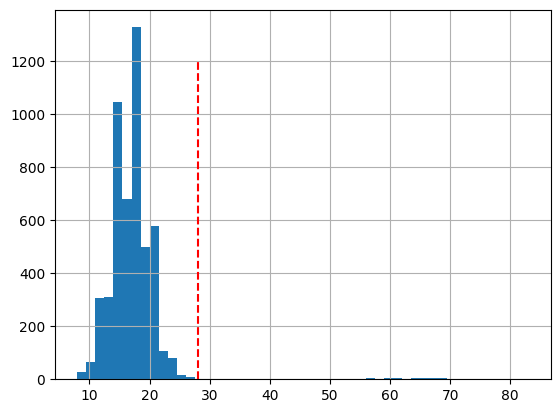

,genus,nspecies,name_size
334,Ara_9225,9,8
288,Bos_9903,10,8
527,Sus_9822,7,8
2074,Pan_9596,2,8
2656,Aix_8831,1,8
...,...,...,...
3265,Amblychaeturichthys_497221,1,26
2433,Tenebrosternarchus_2936481,1,26
4057,Pseudocrossocheilus_369677,1,26
835,Lepidocephalichthys_425478,4,26


In [39]:
name_size_cutoff = 28

genus_df = taxa[6].value_counts().reset_index()
genus_df.columns = ['genus', 'nspecies']
genus_df['name_size'] = genus_df.genus.str.len()

genus_df.name_size.hist(bins=50)
plt.vlines(name_size_cutoff, 0, 1200, 'r', '--')
plt.show()
genus_df = genus_df[genus_df.name_size < name_size_cutoff]
genus_df.sort_values('name_size')

In [40]:
genus_df.genus.str.count('_').value_counts()

1    5046
Name: genus, dtype: int64

In [41]:
taxa

,3,4,5,6,7
0,Actinopteri_186623,Gobiiformes_1489878,Gobiidae_8220,Sicyopus_936280,Sicyopus_zosterophorus_1916785
1,Actinopteri_186623,Osteoglossiformes_41712,Osteoglossidae_27723,Scleropages_27726,Scleropages_formosus_113540
2,Actinopteri_186623,order_Pomacentridae_30863,Pomacentridae_30863,Chrysiptera_80978,Chrysiptera_galba_229101
3,Mammalia_40674,Rodentia_9989,Heteromyidae_10015,Chaetodipus_38664,Chaetodipus_goldmani_145411
4,Mammalia_40674,Chiroptera_9397,Cistugidae_3136025,Cistugo_712047,Cistugo_seabrae_712048
...,...,...,...,...,...
16073,Aves_8782,Passeriformes_9126,Leiothrichidae_1673678,Actinodura_181642,Actinodura_souliei_181643
16074,Actinopteri_186623,Cyprinodontiformes_28738,Goodeidae_28758,Goodea_208335,Goodea_gracilis_208337
16075,Mammalia_40674,Pholidota_9971,Manidae_9972,Manis_9973,Manis_javanica_9974
16076,Lepidosauria_8504,Squamata_8509,Scincidae_66056,Lerista_66057,Lerista_humphriesi_470353


In [43]:
taxa_species = taxa.drop_duplicates(subset=6)
taxa_species = taxa_species[taxa_species[6].isin(genus_df.genus)]
taxa_species

,3,4,5,6,7
0,Actinopteri_186623,Gobiiformes_1489878,Gobiidae_8220,Sicyopus_936280,Sicyopus_zosterophorus_1916785
1,Actinopteri_186623,Osteoglossiformes_41712,Osteoglossidae_27723,Scleropages_27726,Scleropages_formosus_113540
2,Actinopteri_186623,order_Pomacentridae_30863,Pomacentridae_30863,Chrysiptera_80978,Chrysiptera_galba_229101
3,Mammalia_40674,Rodentia_9989,Heteromyidae_10015,Chaetodipus_38664,Chaetodipus_goldmani_145411
4,Mammalia_40674,Chiroptera_9397,Cistugidae_3136025,Cistugo_712047,Cistugo_seabrae_712048
...,...,...,...,...,...
16055,Aves_8782,Caprimulgiformes_8902,Steatornithidae_48433,Steatornis_48434,Steatornis_caripensis_48435
16058,Aves_8782,Coraciiformes_8936,Brachypteraciidae_135163,Geobiastes_1977155,Geobiastes_squamiger_1977156
16059,Actinopteri_186623,Cypriniformes_7952,Leuciscidae_2743726,Ladigesocypris_108513,Ladigesocypris_ghigii_108514
16067,Actinopteri_186623,Siluriformes_7995,Bagridae_31013,Batasio_337693,Batasio_tigrinus_390466


In [ ]:
# some species have no family name
taxa_species[taxa_species[5].str.count('_') > 1]

,3,4,5,6,7
415,Aves_8782,Passeriformes_9126,family_Daphoenositta_254527,Daphoenositta_254527,Daphoenositta_chrysoptera_254528
647,Aves_8782,Procellariiformes_30449,family_Oceanodroma_52123,Oceanodroma_52123,Oceanodroma_melania_79632
884,Aves_8782,Passeriformes_9126,family_Pachycephala_46903,Pachycephala_46903,Pachycephala_melanura_381036
1854,Aves_8782,Procellariiformes_30449,family_Fregetta_37072,Fregetta_37072,Fregetta_tropica_37073
2260,Aves_8782,Passeriformes_9126,family_Turnagra_46905,Turnagra_46905,Turnagra_capensis_46906
2371,Aves_8782,Passeriformes_9126,family_Eulacestoma_461238,Eulacestoma_461238,Eulacestoma_nigropectus_461239
2909,Aves_8782,Passeriformes_9126,family_Rhagologus_156169,Rhagologus_156169,Rhagologus_leucostigma_156170
4153,Actinopteri_186623,Centrarchiformes_1489940,family_Percalates_1545907,Percalates_1545907,Percalates_colonorum_135766
4682,Actinopteri_186623,Cypriniformes_7952,family_Paedocypris_432420,Paedocypris_432420,Paedocypris_micromegethes_1093616
5453,Aves_8782,Passeriformes_9126,family_Ornorectes_2497060,Ornorectes_2497060,Ornorectes_cristatus_254643


<Axes: >

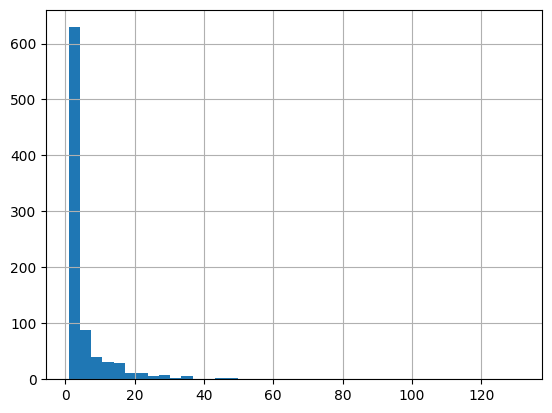

In [56]:
taxa_species.groupby(5)[7].count().hist(bins=40)

In [63]:
selected_species = set(taxa_species[7])
chord_sample = [x for x in verts if x.name.split(';')[-1] in selected_species]

SeqIO.write(outgrp + chord_sample, 'vert_data/chordates_sample.fa', 'fasta-2line')

5047

In [9]:
# next this fasta file was aligned as amino acids and manually filtered
# now we load saved seq ids and again prepare nucleotide fasta
with open('./vert_data/clear_seq_ids.txt') as fin:
    saved_ids = [x.strip().split('.')[0] for x in fin.readlines()]
saved_ids[:5], len(saved_ids)

(['OUTGRP|HG931923', 'LC564971', 'MN885507', 'AY208568', 'AY926394'], 4992)

In [28]:
from copy import copy

selected_species = set(saved_ids)
chord_sample = [x for x in verts if x.name.split('.')[0] in selected_species]
chord_sample_renamed = []
for x in chord_sample:
    x = copy(x)
    x.id = x.name.split(';')[-1]
    x.name = x.name.split(';')[-1]
    x.description = x.name.split(';')[-1]
    chord_sample_renamed.append(x)

outgrp_renamed = copy(outgrp[0])
outgrp_renamed.id = 'OUTGRP ' + outgrp_renamed.name.split(';')[-1]
outgrp_renamed.name = ''
outgrp_renamed.description = ''


SeqIO.write([outgrp_renamed] + chord_sample_renamed, 
            'vert_data/chordates_sample_v2.fa', 'fasta-2line')

4992

In [29]:
outgrp_renamed.name

''

In [25]:
outgrp[0].name

'HG931923.1.7035.8148###root_1;Eukaryota_2759;Chordata_7711;Ascidiacea_7713;Stolidobranchia_7720;Styelidae_7721;Botryllus_30300;Botryllus_schlosseri_30301'